In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.linear_model import Perceptron

Leemos archivo csv.

In [2]:
df = pd.read_csv('./wineQualityReds.csv')

Visualizamos las primeras 5 filas

In [3]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Obtenemos información sobre el tipo de los parámetros y vemos si son nulos o no.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


Calculamos la correlacion del dataframe.

In [5]:
correlacion=df.corr()
correlacion

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123,0.066453
fixed.acidity,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,-0.119869,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,0.090480,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.117850,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,-0.368372,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.136005,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731


In [6]:
correlacion.shape

(13, 13)

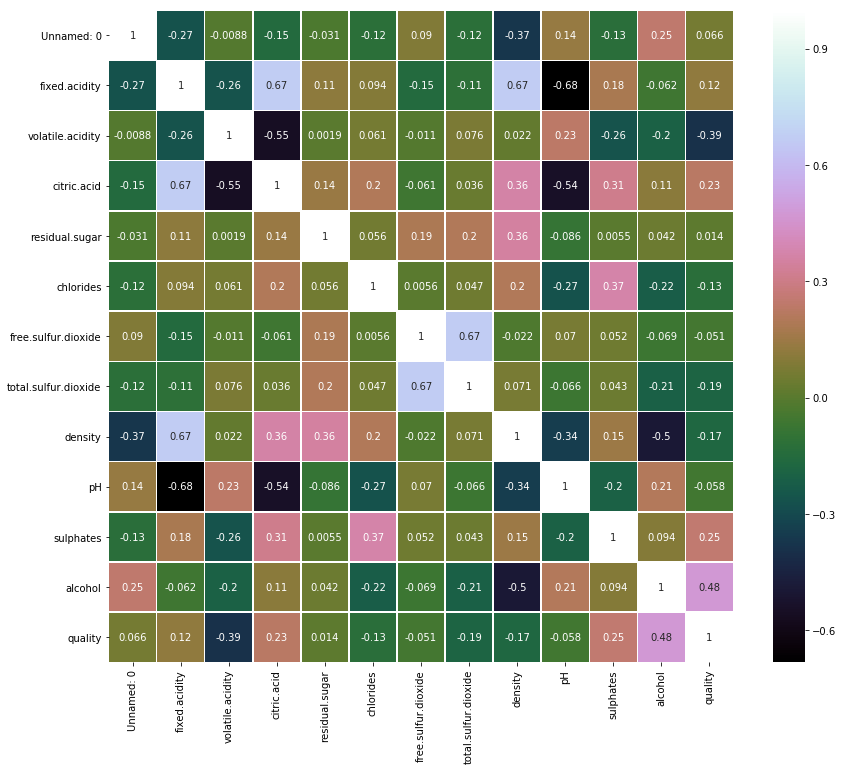

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(correlacion,linewidths=0.5,cmap="cubehelix", annot=True)

In [8]:
#1=calidad baja ,2=calidad intermedia ,3=alta calidad
mpg_labels = [1, 2, 3]

In [9]:
#bins
bins_quality = pd.cut(df['quality'],3, labels=mpg_labels)
bins_quality.head()

0    2
1    2
2    2
3    2
4    2
Name: quality, dtype: category
Categories (3, int64): [1 < 2 < 3]

Creo una columna llamada bins_quality en la que aparece la calidad de los vinos basandose en el valor 1 si es de baja calidad, en el valor 2 si la calidad es intermedia y 3 si la calidad es alta.

In [10]:
df['bins_quality']=bins_quality

In [11]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,bins_quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


Borro la columna quality de la cual obtuve la columna bins_quality.

In [12]:
df.drop(['quality'], axis='columns', inplace=True)

In [13]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,bins_quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [14]:
df.dtypes

Unnamed: 0                 int64
fixed.acidity            float64
volatile.acidity         float64
citric.acid              float64
residual.sugar           float64
chlorides                float64
free.sulfur.dioxide      float64
total.sulfur.dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
bins_quality            category
dtype: object

In [15]:
df.shape

(1599, 13)

Usamos la función shuffle() la cual mezcla o cambia aleatoriamente el orden de los elementos de nuestro dataframe antes de realizar la selección de alguno de ellos. Esta mezcla recuerda en el caso de los juegos de cartas la acción de barajar un número de veces antes de repartir o seleccionar cartas.

In [16]:
df=shuffle(df)
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,bins_quality
685,686,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,2
1545,1546,6.5,0.63,0.33,1.8,0.059,16.0,28.0,0.99531,3.36,0.64,10.1,2
945,946,10.2,0.44,0.42,2.0,0.071,7.0,20.0,0.99566,3.14,0.79,11.1,3
209,210,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5,3
1063,1064,10.2,0.29,0.65,2.4,0.075,6.0,17.0,0.99565,3.22,0.63,11.8,2


Nombro a las columnas del dataframe

In [17]:
columnas=df.columns

Realización de anova: veo si las diferentes columnas se ven afectadas por la calidad 'bins_quality', cuando el p value es menor que 0,05 se ven afectadas por esta.

In [18]:
anova = []
for col in columnas:      

    a = (stats.f_oneway(
            df[col][df['bins_quality']==1],
            df[col][df['bins_quality']==2], 
            df[col][df['bins_quality']==3],
            )) 
    anova.append((col, a))
anova
#si es menor que 0.05 vemos que estan relacionados con la columna bins_quality
columnas_importantes=[i[0] for i in anova if i[1][1]<0.05]
columnas_importantes.append('bins_quality')
columnas_importantes

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'bins_quality']

No quedamos con lo que he denominado columnas_importantes las cuales aparecen en el paso anterior

In [19]:
data=df[columnas_importantes]
data.head()

,fixed.acidity,volatile.acidity,citric.acid,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,bins_quality
685,8.1,0.78,0.23,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,2
1545,6.5,0.63,0.33,0.059,16.0,28.0,0.99531,3.36,0.64,10.1,2
945,10.2,0.44,0.42,0.071,7.0,20.0,0.99566,3.14,0.79,11.1,3
209,11.0,0.30,0.58,0.054,7.0,19.0,0.99800,3.31,0.88,10.5,3
1063,10.2,0.29,0.65,0.075,6.0,17.0,0.99565,3.22,0.63,11.8,2


Empezamos el entrenamiento

In [20]:
col=data.loc[:,data.columns !='bins_quality']
X=col
y=data['bins_quality']
X_train, X_test ,y_train ,y_test= train_test_split(X, y, test_size = 0.2)


# K-NEAREST NEIGHBORS:

In [21]:
#K-Nearest Neighbors
neighbor_model = KNeighborsClassifier(n_neighbors=3)
neighbor_model.fit(X_train, y_train) 
y_pred = neighbor_model.predict(X_test)
confusion=metrics.confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(confusion,score)


[[  2   8   0]
 [  8 248  13]
 [  1  25  15]] 0.828125


In [22]:
#HE TRANSFORMADO LA COLUMNA BINS_QUALITY A NUMERICA
data['bins_quality']=data['bins_quality'].astype('int64')

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# GAUSSIAN NAIVE BAYES:
implementa el algoritmo Gaussian Naive Bayes para la clasificación. Se asume que la probabilidad de las características es gaussiana

In [23]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion2=metrics.confusion_matrix(y_test, y_pred)
score2 = accuracy_score(y_test, y_pred)
print(confusion2,score2)

[[  1   9   0]
 [  4 233  32]
 [  0  14  27]] 0.815625


# Forests of randomized trees:

In [24]:
#Forests of randomized trees
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion3=metrics.confusion_matrix(y_test, y_pred)
score3 = accuracy_score(y_test, y_pred)
print(confusion3,score3)

[[  0   9   1]
 [ 12 239  18]
 [  1  17  23]] 0.81875


In [25]:
#2
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion4=metrics.confusion_matrix(y_test, y_pred)
score4 = accuracy_score(y_test, y_pred)
print(confusion4,score4)

[[  0  10   0]
 [  2 258   9]
 [  0  19  22]] 0.875


n_estimators: es el número de árboles en el bosque. Cuanto más grande, mejor, pero también más tiempo tomará para computar. Además, tenga en cuenta que los resultados dejarán de mejorar significativamente más allá de un número crítico de árboles.

Los buenos resultados a menudo se logran cuando se configura max_depth = None en combinación con min_samples_split = 2 (es decir, cuando se desarrollan completamente los árboles). Sin embargo, tenga en cuenta que estos valores generalmente no son óptimos, y pueden resultar en modelos que consumen mucha RAM.

# STOCHASTIC GRADIENT DESCENT:
Implementa una rutina de aprendizaje de descenso de gradiente estocástico simple que admite diferentes funciones de pérdida y penalizaciones para la clasificación.

In [26]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)   
y_pred = clf.predict(X_test)
confusion5=metrics.confusion_matrix(y_test, y_pred)
score5 = accuracy_score(y_test, y_pred)
print(confusion5,score5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[[  0  10   0]
 [  0 268   1]
 [  0  41   0]] 0.8375


In [27]:
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)   
y_pred = clf.predict(X_test)
confusion5=metrics.confusion_matrix(y_test, y_pred)
score5 = accuracy_score(y_test, y_pred)
print(confusion5,score5)

[[  0  10   0]
 [  0 268   1]
 [  0  41   0]] 0.8375


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [28]:
clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)   
y_pred = clf.predict(X_test)
confusion5=metrics.confusion_matrix(y_test, y_pred)
score5 = accuracy_score(y_test, y_pred)
print(confusion5,score5)

[[  0  10   0]
 [  0 269   0]
 [  0  41   0]] 0.840625


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Las dos primeras funciones de pérdida son perezosas, solo actualizan los parámetros del modelo si un ejemplo viola la restricción de margen, lo que hace que el entrenamiento sea muy eficiente y puede resultar en modelos más dispersos.

# PERCEPTRON:
El Perceptron es un algoritmo de clasificación simple adecuado para el aprendizaje a gran escala. Por defecto: No requiere una tasa de aprendizaje. No está regularizado (penalizado). Actualiza su modelo solo sobre errores. La última característica implica que el Perceptron es un poco más rápido de entrenar que el SGD con hinge loss y que los modelos resultantes son más dispersos.

In [29]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion6=metrics.confusion_matrix(y_test, y_pred)
score6 = accuracy_score(y_test, y_pred)
print(confusion6,score6)

[[  0  10   0]
 [  2 266   1]
 [  0  40   1]] 0.834375
